In [1]:
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head(10)

,episode2,episode3,episode4
abandoned,0,1,1
abide,0,3,0
absolutely,1,0,0
accelerates,0,1,0
accelerating,0,0,1
according,1,0,0
actually,1,3,3
address,1,1,1
adult,1,0,0
advice,0,3,0


In [2]:
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'episode2': [('joel', 29),
  ('tess', 28),
  ('ellie', 22),
  ('like', 20),
  ('know', 18),
  ('snarling', 15),
  ('dont', 14),
  ('infected', 14),
  ('okay', 13),
  ('gonna', 13),
  ('just', 13),
  ('fuck', 13),
  ('yeah', 12),
  ('right', 12),
  ('way', 12),
  ('im', 11),
  ('oh', 10),
  ('music', 10),
  ('playing', 10),
  ('breathing', 10),
  ('mean', 10),
  ('door', 9),
  ('didnt', 8),
  ('bit', 8),
  ('did', 8),
  ('maybe', 8),
  ('theyre', 7),
  ('heavy', 7),
  ('people', 7),
  ('uh', 7)],
 'episode3': [('im', 36),
  ('frank', 31),
  ('playing', 24),
  ('okay', 24),
  ('oh', 24),
  ('just', 23),
  ('music', 22),
  ('joel', 21),
  ('like', 20),
  ('know', 19),
  ('dont', 18),
  ('gonna', 18),
  ('ellie', 17),
  ('yeah', 15),
  ('ive', 14),
  ('time', 13),
  ('tess', 13),
  ('leave', 13),
  ('theres', 12),
  ('love', 12),
  ('long', 12),
  ('uh', 11),
  ('yes', 10),
  ('good', 10),
  ('youre', 10),
  ('infected', 10),
  ('radio', 10),
  ('sounds', 10),
  ('right', 10),
  ('way', 9

In [3]:
for episodes, top_words in top_dict.items():
    print(episodes)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

episode2
joel, tess, ellie, like, know, snarling, dont, infected, okay, gonna, just, fuck, yeah, right
---
episode3
im, frank, playing, okay, oh, just, music, joel, like, know, dont, gonna, ellie, yeah
---
episode4
im, joel, ellie, dont, okay, know, did, yeah, right, like, oh, playing, got, sighs
---


In [6]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for episodes in data.columns:
    top = [word for (word, count) in top_dict[episodes]]
    for t in top:
        words.append(t)
        
words

['joel',
 'tess',
 'ellie',
 'like',
 'know',
 'snarling',
 'dont',
 'infected',
 'okay',
 'gonna',
 'just',
 'fuck',
 'yeah',
 'right',
 'way',
 'im',
 'oh',
 'music',
 'playing',
 'breathing',
 'mean',
 'door',
 'didnt',
 'bit',
 'did',
 'maybe',
 'theyre',
 'heavy',
 'people',
 'uh',
 'im',
 'frank',
 'playing',
 'okay',
 'oh',
 'just',
 'music',
 'joel',
 'like',
 'know',
 'dont',
 'gonna',
 'ellie',
 'yeah',
 'ive',
 'time',
 'tess',
 'leave',
 'theres',
 'love',
 'long',
 'uh',
 'yes',
 'good',
 'youre',
 'infected',
 'radio',
 'sounds',
 'right',
 'way',
 'im',
 'joel',
 'ellie',
 'dont',
 'okay',
 'know',
 'did',
 'yeah',
 'right',
 'like',
 'oh',
 'playing',
 'got',
 'sighs',
 'gonna',
 'sorry',
 'fuck',
 'youre',
 'way',
 'just',
 'music',
 'good',
 'look',
 'kathleen',
 'man',
 'people',
 'henry',
 'think',
 'laughs',
 'time']

In [7]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for episodes in data.columns:
    top = [word for (word, count) in top_dict[episodes]]
    for t in top:
        words.append(t)
        
words

['joel',
 'tess',
 'ellie',
 'like',
 'know',
 'snarling',
 'dont',
 'infected',
 'okay',
 'gonna',
 'just',
 'fuck',
 'yeah',
 'right',
 'way',
 'im',
 'oh',
 'music',
 'playing',
 'breathing',
 'mean',
 'door',
 'didnt',
 'bit',
 'did',
 'maybe',
 'theyre',
 'heavy',
 'people',
 'uh',
 'im',
 'frank',
 'playing',
 'okay',
 'oh',
 'just',
 'music',
 'joel',
 'like',
 'know',
 'dont',
 'gonna',
 'ellie',
 'yeah',
 'ive',
 'time',
 'tess',
 'leave',
 'theres',
 'love',
 'long',
 'uh',
 'yes',
 'good',
 'youre',
 'infected',
 'radio',
 'sounds',
 'right',
 'way',
 'im',
 'joel',
 'ellie',
 'dont',
 'okay',
 'know',
 'did',
 'yeah',
 'right',
 'like',
 'oh',
 'playing',
 'got',
 'sighs',
 'gonna',
 'sorry',
 'fuck',
 'youre',
 'way',
 'just',
 'music',
 'good',
 'look',
 'kathleen',
 'man',
 'people',
 'henry',
 'think',
 'laughs',
 'time']

In [8]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('joel', 3),
 ('ellie', 3),
 ('like', 3),
 ('know', 3),
 ('dont', 3),
 ('okay', 3),
 ('gonna', 3),
 ('just', 3),
 ('yeah', 3),
 ('right', 3),
 ('way', 3),
 ('im', 3),
 ('oh', 3),
 ('music', 3),
 ('playing', 3),
 ('tess', 2),
 ('infected', 2),
 ('fuck', 2),
 ('did', 2),
 ('people', 2),
 ('uh', 2),
 ('time', 2),
 ('good', 2),
 ('youre', 2),
 ('snarling', 1),
 ('breathing', 1),
 ('mean', 1),
 ('door', 1),
 ('didnt', 1),
 ('bit', 1),
 ('maybe', 1),
 ('theyre', 1),
 ('heavy', 1),
 ('frank', 1),
 ('ive', 1),
 ('leave', 1),
 ('theres', 1),
 ('love', 1),
 ('long', 1),
 ('yes', 1),
 ('radio', 1),
 ('sounds', 1),
 ('got', 1),
 ('sighs', 1),
 ('sorry', 1),
 ('look', 1),
 ('kathleen', 1),
 ('man', 1),
 ('henry', 1),
 ('think', 1),
 ('laughs', 1)]

In [9]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

[]

In [12]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [15]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

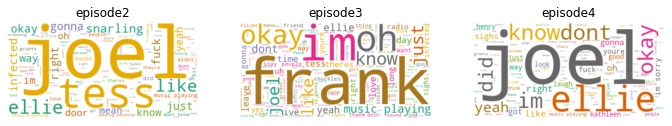

In [16]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['episode2','episode3','episode4']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

Findings

In [17]:
# Find the number of unique words that each episode uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for episode in data.columns:
    uniques = data[episode].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['episode', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,episode,unique_words
0,episode2,690
2,episode4,709
1,episode3,910


In [18]:
# Calculate the words per minute of each episode

# Find the total number of words that a episode uses
total_list = []
for episode in data.columns:
    totals = sum(data[episode])
    total_list.append(totals)
    
# episode special run times from IMDB, in minutes
run_times = [80,85,49]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,episode,unique_words,total_words,run_times,words_per_minute
0,episode2,690,1411,80,17.637500
1,episode3,910,2006,85,23.600000
2,episode4,709,1465,49,29.897959


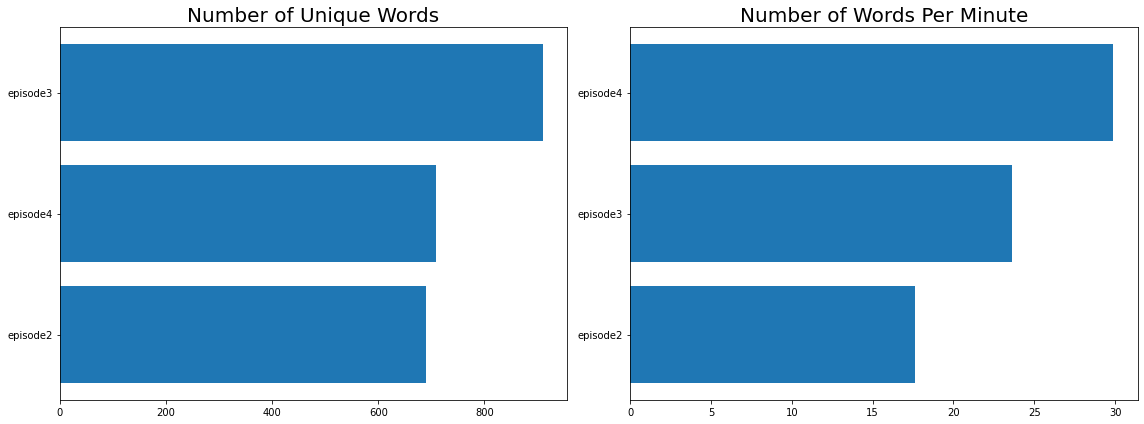

In [20]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.episode)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.episode)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

**Profanity**

In [21]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('joel', 3),
 ('ellie', 3),
 ('like', 3),
 ('know', 3),
 ('dont', 3),
 ('okay', 3),
 ('gonna', 3),
 ('just', 3),
 ('yeah', 3),
 ('right', 3),
 ('way', 3),
 ('im', 3),
 ('oh', 3),
 ('music', 3),
 ('playing', 3),
 ('tess', 2),
 ('infected', 2),
 ('fuck', 2),
 ('did', 2),
 ('people', 2),
 ('uh', 2),
 ('time', 2),
 ('good', 2),
 ('youre', 2),
 ('snarling', 1),
 ('breathing', 1),
 ('mean', 1),
 ('door', 1),
 ('didnt', 1),
 ('bit', 1),
 ('maybe', 1),
 ('theyre', 1),
 ('heavy', 1),
 ('frank', 1),
 ('ive', 1),
 ('leave', 1),
 ('theres', 1),
 ('love', 1),
 ('long', 1),
 ('yes', 1),
 ('radio', 1),
 ('sounds', 1),
 ('got', 1),
 ('sighs', 1),
 ('sorry', 1),
 ('look', 1),
 ('kathleen', 1),
 ('man', 1),
 ('henry', 1),
 ('think', 1),
 ('laughs', 1)]

In [22]:
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
episode2,19,6
episode3,6,5
episode4,12,7


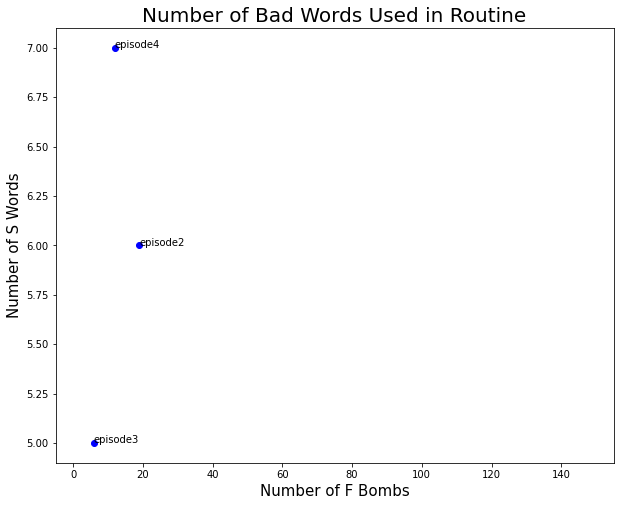

In [25]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, episode in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[episode]
    y = data_profanity.s_word.loc[episode]
    plt.scatter(x, y, color='blue')
    plt.text(x, y, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

In [31]:
data_bad_words = data.transpose()[['infected','fungus']]
data_prof = pd.concat([data_bad_words.infected,data_bad_words.fungus], axis=1)
data_prof.columns = ['infected','fungus']
data_prof

,infected,fungus
episode2,14,2
episode3,10,0
episode4,3,1


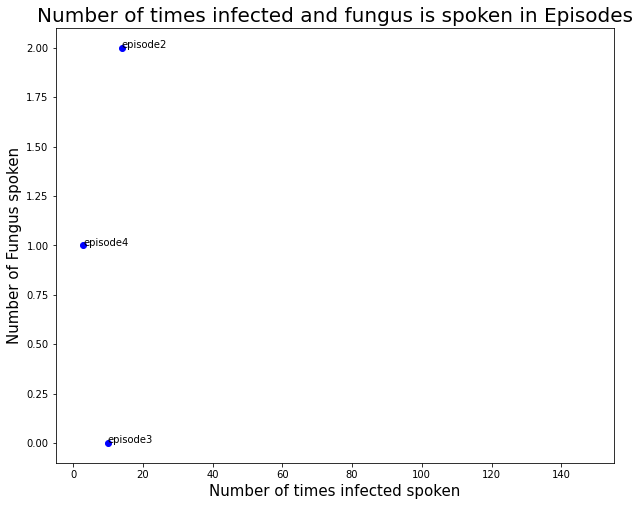

In [33]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, episode in enumerate(data_profanity.index):
    x = data_prof.infected.loc[episode]
    y = data_prof.fungus.loc[episode]
    plt.scatter(x, y, color='blue')
    plt.text(x, y, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of times infected and fungus is spoken in Episodes', fontsize=20)
plt.xlabel('Number of times infected spoken', fontsize=15)
plt.ylabel('Number of Fungus spoken', fontsize=15)

plt.show()